<a href="https://colab.research.google.com/github/dbetanc1/MAT494/blob/main/HW_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Algebra**

# **1.3 Linear Regression**

Linear regression is used frequently in practical applications because of its
simplicity. The models depend linearly on their unknown parameters and
therefore are easier to fit than models which are non-linearly related to their
parameters. As a result, the statistical properties of the resulting estimators
are easier to determine. In this section, we first discuss QR decomposition,
least-squares problem and return to linear regression.

How to Use the Sklearn Linear Regression Function May 30, 2022 by Joshua Ebner

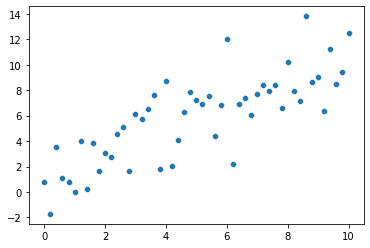

In [ ]:
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

observation_count = 51
x_var = np.linspace(start = 0, stop = 10, num = observation_count)

np.random.seed(22)
y_var = x_var + np.random.normal(size = observation_count, loc = 1, scale = 2)

sns.scatterplot(x = x_var, y = y_var)


In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(x_var.reshape(-1,1), y_var, test_size = .2)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

In [ ]:
linear_regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
linear_regressor.predict(X_test)


array([ 5.97127654,  7.67511022, 10.51483301, 10.32551816,  6.34990625,
        7.48579537,  4.45675772,  4.26744287,  3.51018346,  8.24305478,
        2.75292405])

Linear Regression in Scikit-Learn (sklearn): An Introduction
https://datagy.io/python-sklearn-linear-regression/


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/datagy/data/main/insurance.csv')
print(df.head())

# Returns:
#    age     sex     bmi  children smoker     region      charges
# 0   19  female  27.900         0    yes  southwest  16884.92400
# 1   18    male  33.770         1     no  southeast   1725.55230
# 2   28    male  33.000         3     no  southeast   4449.46200
# 3   33    male  22.705         0     no  northwest  21984.47061
# 4   32    male  28.880         0     no  northwest   3866.85520

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Parameters:
fit_interceptbool, default=True
Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

normalizebool, default=False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

Deprecated since version 1.0: normalize was deprecated in version 1.0 and will be removed in 1.2.
copy_Xbool, default=True
If True, X will be copied; else, it may be overwritten.

n_jobsint, default=None
The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

positivebool, default=False
When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

Attributes:
coef_array of shape (n_features, ) or (n_targets, n_features)
Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.

rank_int
Rank of matrix X. Only available when X is dense.

singular_array of shape (min(X, y),)
Singular values of X. Only available when X is dense.

intercept_float or array of shape (n_targets,)
Independent term in the linear model. Set to 0.0 if fit_intercept = False.

n_features_in_int
Number of features seen during fit.

New in version 0.24.

feature_names_in_ndarray of shape (n_features_in_,)
Names of features seen during fit. Defined only when X has feature names that are all strings.

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


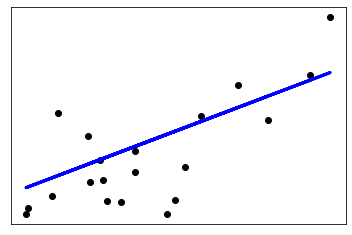

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


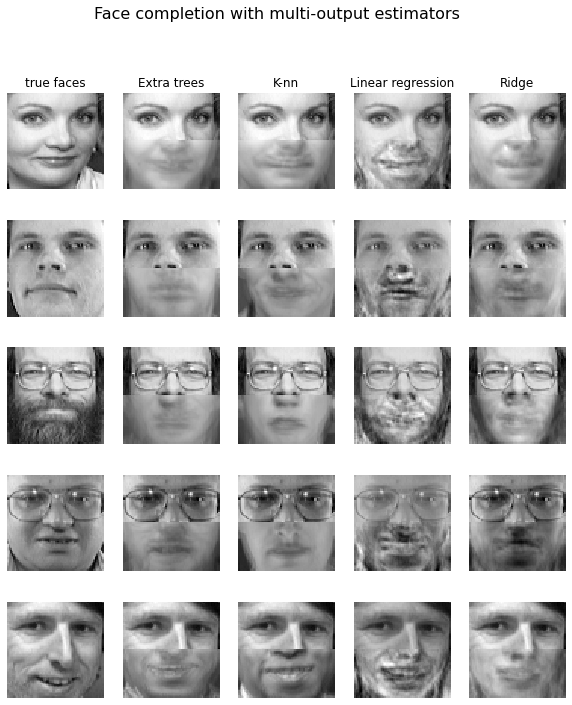

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, : (n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2 :]
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()